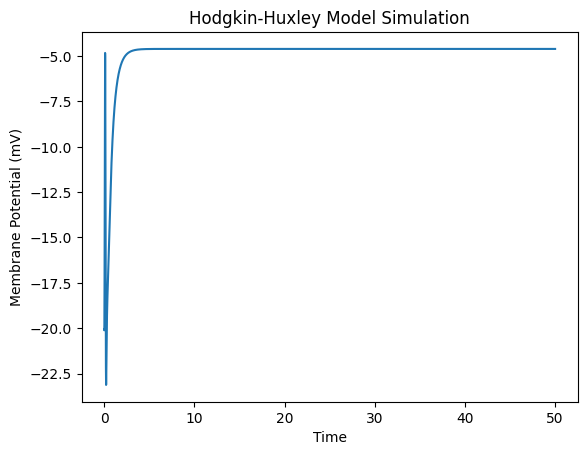

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sabitler
C = 1.0   # Zar kapasitansı (uF/cm^2)
gNa = 120.0  # Sodyum iyon kanalı iletkenliği (mS/cm^2)
gK = 36.0    # Potasyum iyon kanalı iletkenliği (mS/cm^2)
gL = 0.3     # Sızıntı kanalı iletkenliği (mS/cm^2)
ENa = 50.0   # Sodyum iyonu denge potansiyeli (mV)
EK = -77.0   # Potasyum iyonu denge potansiyeli (mV)
ELeak = -54.387  # Sızıntı akımı denge potansiyeli (mV)

# İyon kanalı açılma olasılıklarının başlangıç değerleri
m = 0.0
n = 0.0
h = 0.0

# Membran potansiyeli değerlerinin saklanacağı dizi
V_values = []

# Zaman ve zaman adımı ayarları
t_start = 0.0
t_end = 50.0
dt = 0.01
num_steps = int((t_end - t_start) / dt)

# Başlangıç değerleri
V = -20.0  # Membran potansiyeli (mV)
I = 2.0  # Giriş akımı (uA/cm^2)

# Zaman adımlarını döngüyle hesaplama
for step in range(num_steps):
    t = t_start + step * dt

    # İyon akımlarını hesaplama
    INa = gNa * (m**3) * h * (V - ENa)
    IK = gK * (n**4) * (V - EK)
    Ileak = gL * (V - ELeak)

    # Membran potansiyelindeki değişimi hesaplama
    dV = (1/C) * (I - INa - IK - Ileak) * dt

    # Membran potansiyelini güncelleme
    V += dV

    # İyon kanalı açılma olasılıklarını güncelleme
    alpha_m = 0.1 * (V + 5.0) / (1.0 - np.exp(-0.1 * (V + 5.0)))
    beta_m = 4.0 * np.exp(-0.0556 * (V + 65.0))
    dm = alpha_m * (1 - m) - beta_m * m * dt
    m += dm

    alpha_n = 0.01 * (V + 10.0) / (1.0 - np.exp(-0.1 * (V + 10.0)))
    beta_n = 0.125 * np.exp(-0.0125 * (V + 65.0))
    dn = alpha_n * (1 - n) - beta_n * n * dt
    n += dn

    alpha_h = 0.07 * np.exp(-0.05 * (V + 65.0))
    beta_h = 1.0 / (1.0 + np.exp(-0.1))
    dh = alpha_h * (1 - h) - beta_h * h * dt
    h += dh

    # Membran potansiyelini saklama
    V_values.append(V)

# Membran potansiyelini zaman grafiği olarak görselleştirme
time = np.linspace(t_start, t_end, num_steps)
plt.plot(time, V_values)
plt.xlabel('Time')
plt.ylabel('Membrane Potential (mV)')
plt.title('Hodgkin-Huxley Model Simulation')
plt.show()


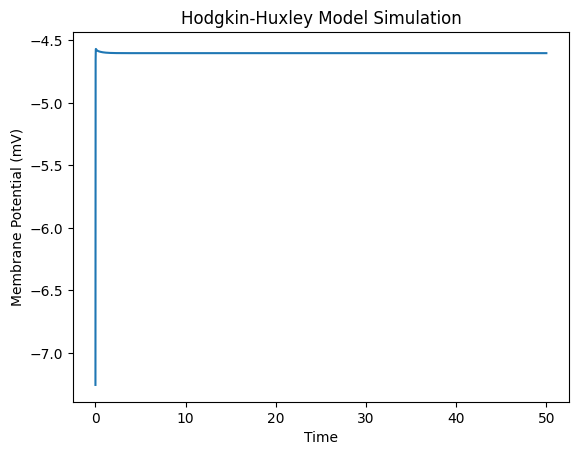

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sinir ağı parametreleri
input_dim = 2
hidden_dim = 2
output_dim = 2

# Ağırlık ve bias değerleri
np.random.seed(42)
W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros(hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros(output_dim)

# Membran potansiyeli değerlerinin saklanacağı dizi
V_values = []

# Zaman ve zaman adımı ayarları
t_start = 0.0
t_end = 50.0
dt = 0.01
num_steps = int((t_end - t_start) / dt)

# Başlangıç değerleri
V = -20.0  # Membran potansiyeli (mV)
I = 2.0  # Giriş akımı (uA/cm^2)

# Zaman adımlarını döngüyle hesaplama
for step in range(num_steps):
    t = t_start + step * dt

    # İyon akımlarını hesaplama
    INa = gNa * (m**3) * h * (V - ENa)
    IK = gK * (n**4) * (V - EK)
    Ileak = gL * (V - ELeak)

    # Membran potansiyelindeki değişimi hesaplama
    dV = (1/C) * (I - INa - IK - Ileak) * dt

    # Membran potansiyelini güncelleme
    V += dV

    # İyon kanalı açılma olasılıklarını güncelleme
    alpha_m = 0.1 * (V + 5.0) / (1.0 - np.exp(-0.1 * (V + 5.0)))
    beta_m = 4.0 * np.exp(-0.0556 * (V + 65.0))
    dm = alpha_m * (1 - m) - beta_m * m * dt
    m += dm

    alpha_n = 0.01 * (V + 10.0) / (1.0 - np.exp(-0.1 * (V + 10.0)))
    beta_n = 0.125 * np.exp(-0.0125 * (V + 65.0))
    dn = alpha_n * (1 - n) - beta_n * n * dt
    n += dn

    alpha_h = 0.07 * np.exp(-0.05 * (V + 65.0))
    beta_h = 1.0 / (1.0 + np.exp(-0.1))
    dh = alpha_h * (1 - h) - beta_h * h * dt
    h += dh

    # Membran potansiyelini saklama
    V_values.append(V)

# Membran potansiyelini zaman grafiği olarak görselleştirme
time = np.linspace(t_start, t_end, num_steps)
plt.plot(time, V_values)
plt.xlabel('Time')
plt.ylabel('Membrane Potential (mV)')
plt.title('Hodgkin-Huxley Model Simulation')
plt.show()


In [ ]:
import numpy as np

# İletişim parametreleri
beta = 0.9
learning_rate = 0.1

# Sinir ağı parametreleri
input_dim = 2
hidden_dim = 2
output_dim = 2

# Ağırlık ve bias değerleri
np.random.seed(42)
W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros(hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros(output_dim)

# Membran potansiyeli değerlerinin saklanacağı dizi
V_values = []

# Zaman ve zaman adımı ayarları
t_start = 0.0
t_end = 50.0
dt = 0.01
num_steps = int((t_end - t_start) / dt)

# Başlangıç değerleri
V = -20.0  # Membran potansiyeli (mV)
I = 2.0  # Giriş akımı (uA/cm^2)

# Zaman adımlarını döngüyle hesaplama
for step in range(num_steps):
    t = t_start + step * dt

    # İyon akımlarını hesaplama
    INa = gNa * (m**3) * h * (V - ENa)
    IK = gK * (n**4) * (V - EK)
    Ileak = gL * (V - ELeak)

    # Membran potansiyelindeki değişimi hesaplama
    dV = (1/C) * (I - INa - IK - Ileak) * dt

    # Membran potansiyelini güncelleme
    V += dV

    # İyon kanalı açılma olasılıklarını güncelleme
    alpha_m = 0.1 * (V + 5.0) / (1.0 - np.exp(-0.1 * (V + 5.0)))
    beta_m = 4.0 * np.exp(-0.0556 * (V + 65.0))
    dm = alpha_m * (1 - m) - beta_m * m * dt
    m += dm

    alpha_n = 0.01 * (V + 10.0) / (1.0 - np.exp(-0.1 * (V + 10.0)))
    beta_n = 0.125 * np.exp(-0.0125 * (V + 65.0))
    dn = alpha_n * (1 - n) - beta_n * n * dt
    n += dn

    alpha_h = 0.07 * np.exp(-0.05 * (V + 65.0))
    beta_h = 1.0 / (1.0 + np.exp(-0.1))
    dh = alpha_h * (1 - h) - beta_h * h * dt
    h += dh

    # Membran potansiyelini saklama
    V_values.append(V)

    # İletişimde kullanılacak nokta verileri
blue_position = np.array([1.0, 2.0])
red_position = np.array([3.0, 4.0])

# İletişim adımları
iterations = 10

# Sinir ağı güncelleme işlemi
def update_network():
    global blue_position, red_position

    # Lorentz dönüşümü
    gamma = 1 / np.sqrt(1 - beta**2)
    transformed_blue_position = gamma * (blue_position - beta * red_position)
    transformed_red_position = gamma * (red_position - beta * blue_position)

    # Sinir ağı giriş değerleri
    X = np.array([transformed_blue_position, transformed_red_position])

    # Feedforward hesaplama
    hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
    output_layer = np.dot(hidden_layer, W2) + b2

    # Sinir ağı çıkış değerleri
    blue_output = output_layer[0]
    red_output = output_layer[1]

    # İletişim hızlarının güncellenmesi
    blue_velocity = blue_output * (red_position - beta * blue_output * blue_position)
    red_velocity = red_output * (blue_position - beta * red_output * red_position)

    # Noktaların konumlarının güncellenmesi
    blue_position += learning_rate * blue_velocity
    red_position += learning_rate * red_velocity

    return blue_position, red_position

# İletişim adımlarının simülasyonu
for i in range(iterations):
    blue_position, red_position = update_network()
    print(f"Iteration {i+1}: Blue Position = {blue_position}, Red Position = {red_position}")



Iteration 1: Blue Position = [1. 2.], Red Position = [-21.75188563  -1.12848474]
Iteration 2: Blue Position = [1.44670563 0.23348059], Red Position = [-21.75188563  -1.12848474]
Iteration 3: Blue Position = [9.83735157 0.14795281], Red Position = [12.76126262 -0.66579026]
Iteration 4: Blue Position = [-5.52577516 -0.08913868], Red Position = [11.33741637 -0.64206927]
Iteration 5: Blue Position = [62.09095547 -0.20722025], Red Position = [-3.9952318   0.39324782]
Iteration 6: Blue Position = [-1609.61796354     4.71268854], Red Position = [598.26911235  -9.1498082 ]
Iteration 7: Blue Position = [ 1.90807409e+08 -1.32388897e+05], Red Position = [-15701507.78101728    241179.73767976]
Iteration 8: Blue Position = [-5.11225960e+22  3.54656816e+19], Red Position = [ 1.29898323e+22 -4.71199180e+19]
Iteration 9: Blue Position = [ 4.68047584e+66 -7.66808640e+62], Red Position = [-2.88731573e+65  1.04721139e+63]
Iteration 10: Blue Position = [-7.31330260e+197  1.19798017e+194], Red Position = [

In [ ]:
ct_prime = ct - 0.001 * (1/N) * ∑(∂(ct)/∂f, ∂x/∂f, ∂y/∂f, ∂z/∂f)
x_prime = x - 0.001 * (1/N) * ∑(∂(ct)/∂f, ∂x/∂f, ∂y/∂f, ∂z/∂f)
y_prime = y - 0.001 * (1/N) * ∑(∂(ct)/∂f, ∂x/∂f, ∂y/∂f, ∂z/∂f)
z_prime = z - 0.001 * (1/N) * ∑(∂(ct)/∂f, ∂x/∂f, ∂y/∂f, ∂z/∂f)
